# Capstone Project: Diabetes Prediction

**Overview**: Diabetes is a chronic medical condition that affects millions of people worldwide. Early detection and proper management of diabetes can help prevent severe complications such as heart disease, kidney failure, and nerve damage. The goal of this project is to develop a machine learning model that can predict whether a person is likely to develop diabetes based on their medical and demographic data. How can this model assist doctors and healthcare professionals, common people in early diabetes detection? and how can this model be integrated into a web or mobile application for public use.

### Getting Started

Our dataset comes from the Kaggle dataset https://www.kaggle.com/datasets/asinow/diabetes-dataset.  

### Read in the Data

In [27]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Statistical Tests
from scipy.stats import chi2_contingency, zscore, anderson, kruskal, mannwhitneyu

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
diabetes_df = pd.read_csv("data/diabetes_dataset.csv")

In [25]:
diabetes_df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


### Basic Exploration

**Age**: The age of the individual (18-90 years).

**Pregnancies**: Number of times the patient has been pregnant.

**BMI (Body Mass Index)**: A measure of body fat based on height and weight (kg/m²).

**Glucose**: Blood glucose concentration (mg/dL), a key diabetes indicator.

**BloodPressure**: Systolic blood pressure (mmHg), higher levels may indicate hypertension.

**HbA1c**: Hemoglobin A1c level (%), representing average blood sugar over months.

**LDL (Low-Density Lipoprotein)**: "Bad" cholesterol level (mg/dL).

**HDL (High-Density Lipoprotein)**: "Good" cholesterol level (mg/dL).

**Triglycerides**: Fat levels in the blood (mg/dL), high values increase diabetes risk.

**WaistCircumference**: Waist measurement (cm), an indicator of central obesity.

**HipCircumference**: Hip measurement (cm), used to calculate WHR.

**WHR (Waist-to-Hip Ratio)**: Waist circumference divided by hip circumference.

**FamilyHistory**: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).

**DietType**: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).

**Hypertension**: Presence of high blood pressure (1 = Yes, 0 = No).

**MedicationUse**: Indicates if the individual is taking medication (1 = Yes, 0 = No).

**Outcome**: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).

In [37]:
diabetes_df.info() # Checking null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

**Insights**:
- No missing values.
- Correct data types.
- Large dataset.

In [40]:
diabetes_df.duplicated().sum()

0

In [44]:
diabetes_df.describe() # To get a quick overview of the data

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


**Insight**: We must perform feature scaling.

### Distribution of Glucose Levels

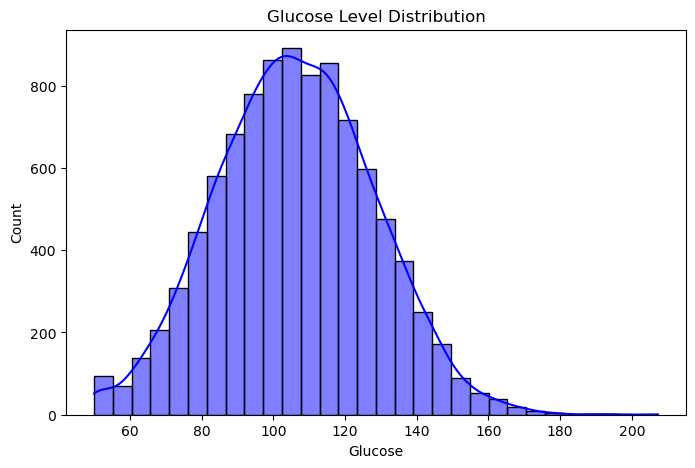

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(diabetes_df["Glucose"], kde=True, bins=30, color='blue')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

### BMI Distribution

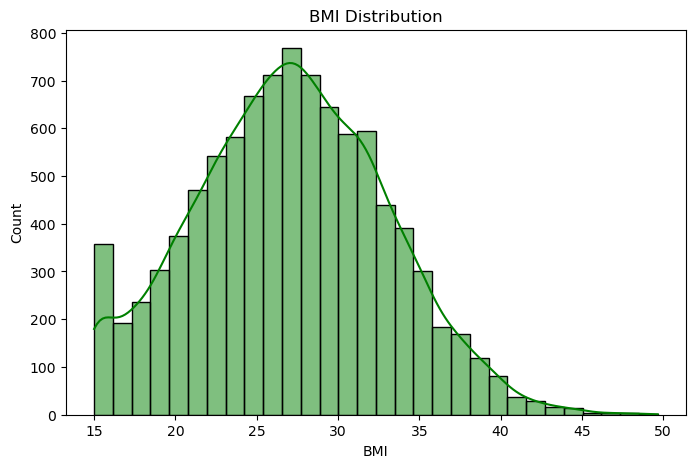

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(diabetes_df["BMI"], kde=True, bins=30, color='green')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [61]:
### Age Distribution

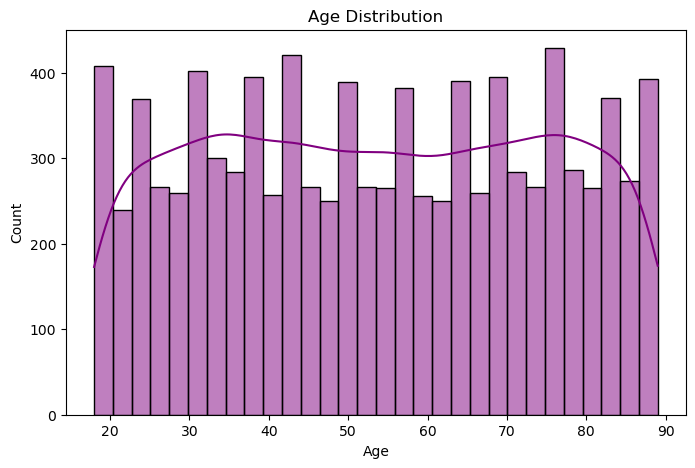

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(diabetes_df["Age"], kde=True, bins=30, color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Blood Pressure Distribution

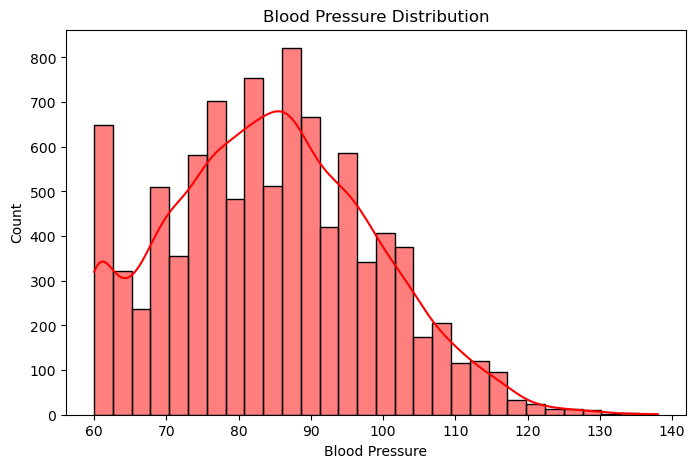

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(diabetes_df["BloodPressure"], kde=True, bins=30, color='red')
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.show()

### Correlation Heatmap

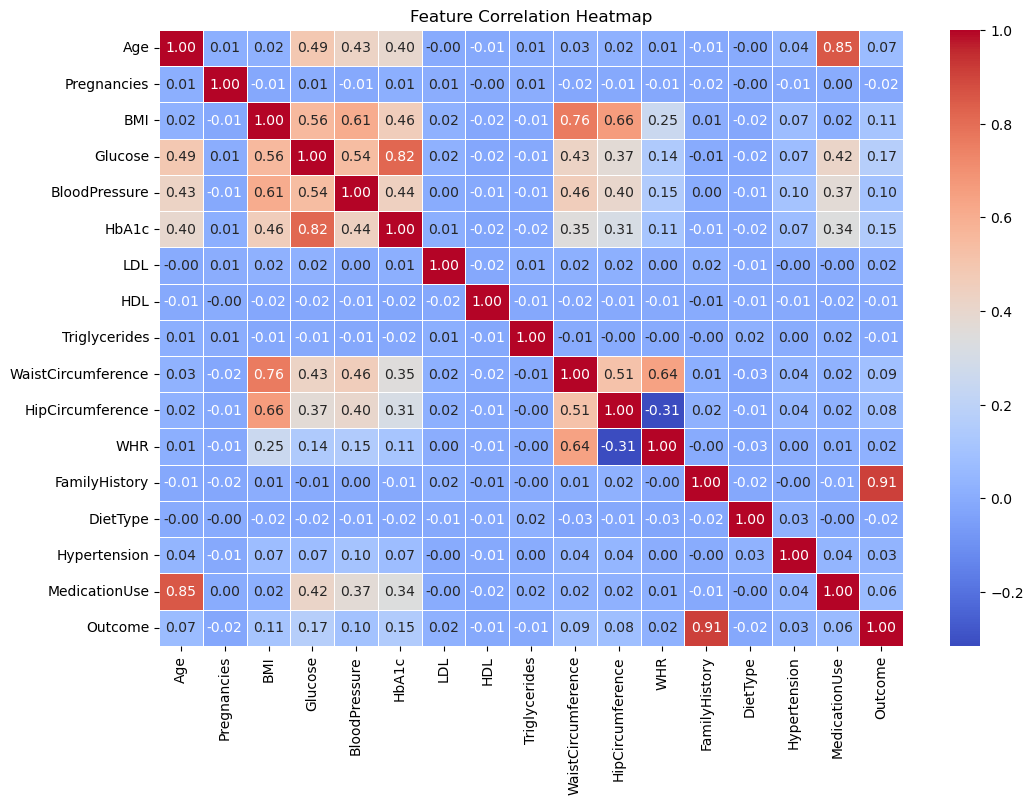

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Glucose vs. Age Scatter Plot

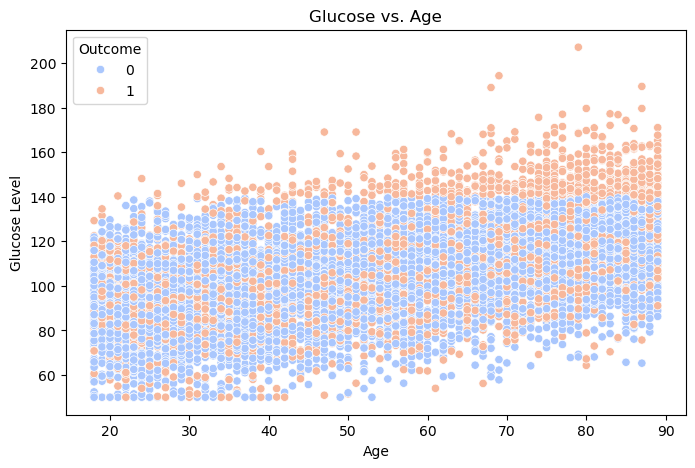

In [78]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=diabetes_df["Age"], y=diabetes_df["Glucose"], hue=diabetes_df["Outcome"], palette="coolwarm")
plt.title("Glucose vs. Age")
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.show()

### Diabetes Outcome Count

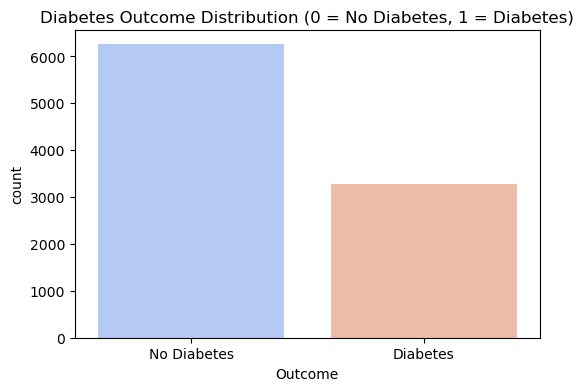

In [83]:
plt.figure(figsize=(6,4))
sns.countplot(x=diabetes_df["Outcome"], palette="coolwarm")
plt.title("Diabetes Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.show()

### Waist Circumference Distribution

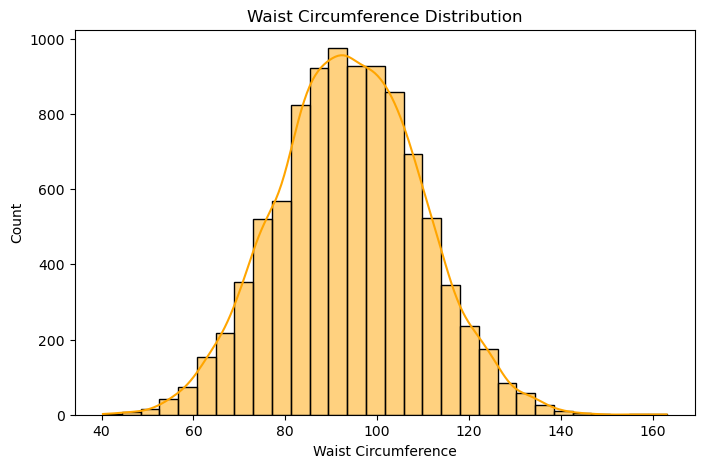

In [86]:
plt.figure(figsize=(8,5))
sns.histplot(diabetes_df["WaistCircumference"], kde=True, bins=30, color='orange')
plt.title("Waist Circumference Distribution")
plt.xlabel("Waist Circumference")
plt.ylabel("Count")
plt.show()

### LDL vs. HDL Cholesterol

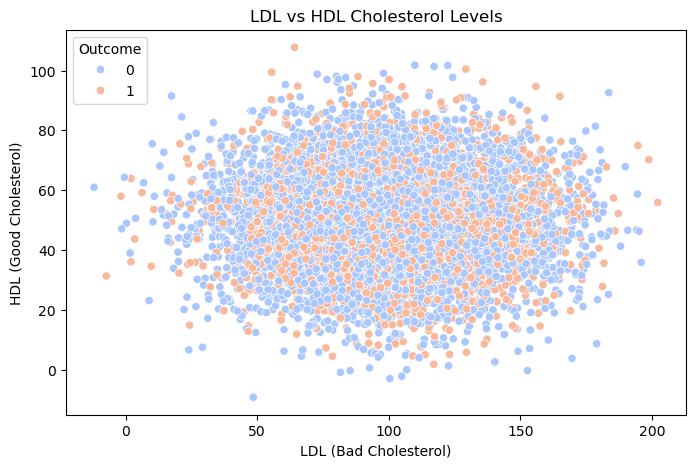

In [89]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=diabetes_df["LDL"], y=diabetes_df["HDL"], hue=diabetes_df["Outcome"], palette="coolwarm")
plt.title("LDL vs HDL Cholesterol Levels")
plt.xlabel("LDL (Bad Cholesterol)")
plt.ylabel("HDL (Good Cholesterol)")
plt.show()

### BMI vs. Glucose Boxplot by Outcome

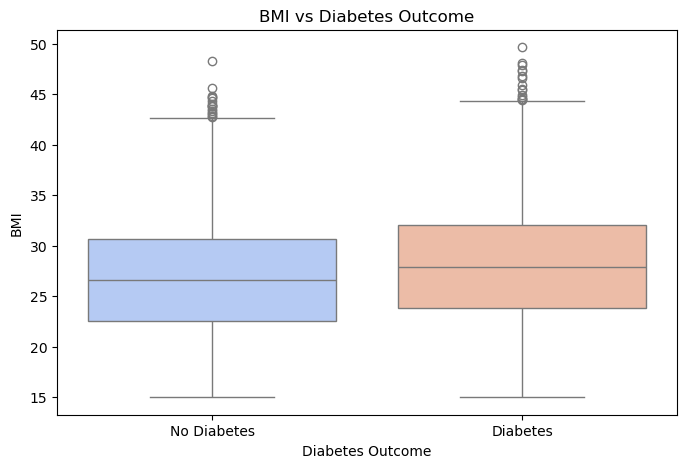

In [92]:
plt.figure(figsize=(8,5))
sns.boxplot(x=diabetes_df["Outcome"], y=diabetes_df["BMI"], palette="coolwarm")
plt.title("BMI vs Diabetes Outcome")
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.xlabel("Diabetes Outcome")
plt.ylabel("BMI")
plt.show()